# <font color='#d50283'>IT Academy - Data Science</font>
##  S12 T01: Pipelines, grid search i text mining
### Luis Ortas

***

## Descripció
### Comencem a familiaritzar-nos amb Pipelines, grid search i text mining !!! Comencem amb uns quants exercicis bàsics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statistics import mean

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('barcelona.csv')

In [4]:
df.head(10)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2008-07-01,27,22,0.0,14.5,6,6,4,04:04 AM,08:20 PM,...,25,19,8,63,0.0,1015,27,10,248,12
1,2008-07-02,25,19,0.0,14.5,6,6,0,05:07 AM,09:23 PM,...,24,11,6,78,0.0,1012,25,10,218,9
2,2008-07-03,25,20,0.0,14.5,6,6,0,06:21 AM,10:12 PM,...,23,14,22,73,0.0,1012,25,10,164,11
3,2008-07-04,25,19,0.0,14.5,6,6,3,07:41 AM,10:51 PM,...,22,22,5,68,0.0,1017,25,10,186,16
4,2008-07-05,27,20,0.0,14.5,6,6,10,08:59 AM,11:21 PM,...,24,18,5,74,0.0,1014,27,10,232,14
5,2008-07-06,27,20,0.0,14.5,6,6,17,10:14 AM,11:47 PM,...,24,12,10,73,0.1,1011,27,10,107,9
6,2008-07-07,24,19,0.0,14.5,6,6,25,11:24 AM,No moonset,...,21,15,43,77,0.7,1014,24,8,121,12
7,2008-07-08,23,17,0.0,14.5,6,6,32,12:31 PM,12:09 AM,...,21,14,23,76,0.0,1019,23,10,121,10
8,2008-07-09,25,17,0.0,14.5,6,6,39,01:36 PM,12:30 AM,...,22,12,12,79,0.0,1019,25,10,145,10
9,2008-07-10,25,20,0.0,14.5,6,6,47,02:39 PM,12:51 AM,...,24,16,17,76,0.0,1015,25,10,232,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          3946 non-null   object 
 1   maxtempC           3946 non-null   int64  
 2   mintempC           3946 non-null   int64  
 3   totalSnow_cm       3946 non-null   float64
 4   sunHour            3946 non-null   float64
 5   uvIndex            3946 non-null   int64  
 6   uvIndex.1          3946 non-null   int64  
 7   moon_illumination  3946 non-null   int64  
 8   moonrise           3946 non-null   object 
 9   moonset            3946 non-null   object 
 10  sunrise            3946 non-null   object 
 11  sunset             3946 non-null   object 
 12  DewPointC          3946 non-null   int64  
 13  FeelsLikeC         3946 non-null   int64  
 14  HeatIndexC         3946 non-null   int64  
 15  WindChillC         3946 non-null   int64  
 16  WindGustKmph       3946 

In [6]:
df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

### Normalizamos el viento

In [9]:
def wind(x):
    w='N'
    if x<34:
        w='N'
        n=0
    elif x>34 and x<79: # no utilizamos el igual ya que todos los datos son enteros .
        w='NE'
        n=45
    elif x>79 and x<124:
        w='E'
        d=90
    elif x>124 and x<169:
        w='SE'
        d=135
        
    elif x>169 and x<214:
        w='S'
        d=180
    elif x>214 and x<259:
        w='SW'
        d=225
    elif x>259 and x<304:
        w='W'
        d=270
    elif x>304 and x<349:
        w='NW'
        d=315
    elif x>349: 
        w='N'
        d=0

        
   
        
    return w
df['wind']=df['winddirDegree'].apply(lambda x: wind(x))

In [10]:
def wind(x):
    w='N'
    if x<34:
       
        x=0
    elif x>34 and x<79: # no utilizamos el igual ya que todos los datos son enteros .
       
        x=45
    elif x>79 and x<124:
       
        x=90
    elif x>124 and x<169:
  
        x=135
        
    elif x>169 and x<214:
      
        x=180
    elif x>214 and x<259:
     
        x=225
    elif x>259 and x<304:
     
        x=270
    elif x>304 and x<349:
      
        x=315
    elif x>349: 
    
        x=0

           
        
    return x
df['wind_gr']=df['winddirDegree'].apply(lambda x: wind(x))

In [12]:
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,wind,wind_gr
0,2008-07-01,27,22,0.0,14.5,6,6,4,04:04 AM,08:20 PM,...,8,63,0.0,1015,27,10,248,12,SW,225
1,2008-07-02,25,19,0.0,14.5,6,6,0,05:07 AM,09:23 PM,...,6,78,0.0,1012,25,10,218,9,SW,225
2,2008-07-03,25,20,0.0,14.5,6,6,0,06:21 AM,10:12 PM,...,22,73,0.0,1012,25,10,164,11,SE,135
3,2008-07-04,25,19,0.0,14.5,6,6,3,07:41 AM,10:51 PM,...,5,68,0.0,1017,25,10,186,16,S,180
4,2008-07-05,27,20,0.0,14.5,6,6,10,08:59 AM,11:21 PM,...,5,74,0.0,1014,27,10,232,14,SW,225


In [13]:
df.isna().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
wind                 0
wind_gr              0
dtype: int64

In [14]:
# creamos la columna mes
from datetime import datetime
def mes(string):
    date_object = datetime.strptime(string, "%Y-%m-%d")
    mes=date_object.month
   
    return mes

In [15]:
mes('2018-12-01')

12

In [16]:
df['Month']=df['date_time'].apply(lambda x: mes(x))

In [17]:
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,wind,wind_gr,Month
0,2008-07-01,27,22,0.0,14.5,6,6,4,04:04 AM,08:20 PM,...,63,0.0,1015,27,10,248,12,SW,225,7
1,2008-07-02,25,19,0.0,14.5,6,6,0,05:07 AM,09:23 PM,...,78,0.0,1012,25,10,218,9,SW,225,7
2,2008-07-03,25,20,0.0,14.5,6,6,0,06:21 AM,10:12 PM,...,73,0.0,1012,25,10,164,11,SE,135,7
3,2008-07-04,25,19,0.0,14.5,6,6,3,07:41 AM,10:51 PM,...,68,0.0,1017,25,10,186,16,S,180,7
4,2008-07-05,27,20,0.0,14.5,6,6,10,08:59 AM,11:21 PM,...,74,0.0,1014,27,10,232,14,SW,225,7


In [15]:
df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'wind', 'wind_gr', 'Month'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          3946 non-null   object 
 1   maxtempC           3946 non-null   int64  
 2   mintempC           3946 non-null   int64  
 3   totalSnow_cm       3946 non-null   float64
 4   sunHour            3946 non-null   float64
 5   uvIndex            3946 non-null   int64  
 6   uvIndex.1          3946 non-null   int64  
 7   moon_illumination  3946 non-null   int64  
 8   moonrise           3946 non-null   object 
 9   moonset            3946 non-null   object 
 10  sunrise            3946 non-null   object 
 11  sunset             3946 non-null   object 
 12  DewPointC          3946 non-null   int64  
 13  FeelsLikeC         3946 non-null   int64  
 14  HeatIndexC         3946 non-null   int64  
 15  WindChillC         3946 non-null   int64  
 16  WindGustKmph       3946 

***
## Exercici 1
#### Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

### Realizarmos dos tipos de Random Forest:
- Clasificacion
- Regresion.

Empezamos con clasificación. Crearemos la columna Rain cuando las precipitaciones son superiores a 0 mm.

### Clasificación

In [19]:
df_clas=df[['Month','maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour','uvIndex','moon_illumination', 'FeelsLikeC',
        'cloudcover', 'humidity', 'precipMM','pressure', 'visibility', 'windspeedKmph','wind_gr']]

In [20]:
df_clas.head()

,Month,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,FeelsLikeC,cloudcover,humidity,precipMM,pressure,visibility,windspeedKmph,wind_gr
0,7,27,22,0.0,14.5,6,4,26,8,63,0.0,1015,10,12,225
1,7,25,19,0.0,14.5,6,0,26,6,78,0.0,1012,10,9,225
2,7,25,20,0.0,14.5,6,0,24,22,73,0.0,1012,10,11,135
3,7,25,19,0.0,14.5,6,3,22,5,68,0.0,1017,10,16,180
4,7,27,20,0.0,14.5,6,10,26,5,74,0.0,1014,10,14,225


In [21]:
# precipitación por milimitros.
df_clas['Rain'] = np.where(df_clas['precipMM'] > 0, 1, 0)
df_clas.drop(['precipMM'],axis=1,inplace=True)

In [22]:
df_clas.Rain.value_counts()

0    2341
1    1605
Name: Rain, dtype: int64

In [21]:
### CARACTERISTICAS
df_clas.columns

Index(['Month', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'FeelsLikeC', 'cloudcover', 'humidity', 'pressure',
       'visibility', 'windspeedKmph', 'wind_gr', 'Rain'],
      dtype='object')

In [23]:
y=df_clas['Rain']
X=df_clas.drop(['Rain'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- **Base model:** PAra comparar las mejoras con el ajuste de hiperparamentros creamos un modelo RandomForest con los parametros de defecto.

In [24]:
scaler_base = StandardScaler()
rf_base = RandomForestClassifier(random_state=42)

pipe_base = Pipeline([('scaler', scaler_base),
                     ('classifier', rf_base)
                    ]);

pipe_base.fit(X_train, y_train);


In [25]:
target_names=['No_llueve','Llueve']

In [26]:
print(classification_report(y_test, pipe_base.predict(X_test), digits=4, target_names=target_names))

              precision    recall  f1-score   support

   No_llueve     0.8181    0.8586    0.8378       707
      Llueve     0.7738    0.7170    0.7443       477

    accuracy                         0.8015      1184
   macro avg     0.7959    0.7878    0.7911      1184
weighted avg     0.8002    0.8015    0.8001      1184



In [27]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(pipe_base.get_params())

Parameters currently in use:

{'classifier': RandomForestClassifier(random_state=42),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': 42,
 'classifier__verbose': 0,
 'classifier__warm_start': False,
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
           ('classifier', RandomForestClassifier(random_state=42))],
 'verbose': False}


Random Search: Primero hacemos una exploración rapida de los hiperparametros haciendo un random search y a partir del resultado obtenida haremos un GridSearch.

In [29]:
# Random Search with Cross Validation

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,5,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 5, 6],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [30]:


scaler_random = StandardScaler();
rf_random = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(estimator = rf_random, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1,
                               refit=True);

pipe_random_search = Pipeline([('scaler', scaler_random),
                     ('classifier', rf_random_search)
                    ]);

pipe_random_search.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [31]:
print('Classification report (Randomized Search best parameters):\n')
print(classification_report(y_test, pipe_random_search.predict(X_test), digits=4, target_names=target_names))

Classification report (Randomized Search best parameters):

              precision    recall  f1-score   support

   No_llueve     0.8331    0.8685    0.8504       707
      Llueve     0.7919    0.7421    0.7662       477

    accuracy                         0.8176      1184
   macro avg     0.8125    0.8053    0.8083      1184
weighted avg     0.8165    0.8176    0.8165      1184



In [32]:
print("Best Parameters after Randomized Search:\n")

pipe_random_search['classifier'].best_params_

Best Parameters after Randomized Search:



{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

GridSearch:

In [33]:
param_grid = {
    'bootstrap': [True],
    'criterion': ['gini'],
    'max_depth': [70, 80, 90, 100],
    'max_features': ['log2'],
    'min_samples_leaf': [5,6,7],
    'min_samples_split': [10,15,25],
    'n_estimators': [1200, 1300, 11400]
}

scaler_grid = StandardScaler();
rf_grid = RandomForestClassifier(random_state=42);

rf_grid_search = GridSearchCV(estimator = rf_grid, 
                       param_grid = param_grid,
                       cv = 3,
                       verbose=2,
                       n_jobs = -1,
                       refit=True);

pipe_grid_search = Pipeline([('scaler', scaler_grid),
                             ('classifier', rf_grid_search)
                            ]);

pipe_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GridSearchCV(cv=3,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'bootstrap': [True],
                                          'criterion': ['gini'],
                                          'max_depth': [70, 80, 90, 100],
                                          'max_features': ['log2'],
                                          'min_samples_leaf': [5, 6, 7],
                                          'min_samples_split': [10, 15, 25],
                                          'n_estimators': [1200, 1300, 11400]},
                              verbose=2))])

In [34]:
print('Classification report (GridSearchCV best parameters):')
print(classification_report(y_test, pipe_grid_search.predict(X_test), digits=4, target_names=target_names))

Classification report (GridSearchCV best parameters):
              precision    recall  f1-score   support

   No_llueve     0.8277    0.8699    0.8483       707
      Llueve     0.7914    0.7317    0.7603       477

    accuracy                         0.8142      1184
   macro avg     0.8096    0.8008    0.8043      1184
weighted avg     0.8131    0.8142    0.8129      1184



In [35]:
pipe_grid_search['classifier'].best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 70,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1300}

In [36]:
param_grid = {
    'bootstrap': [True],
    'criterion': ['gini'],
    'max_depth': [70, 80, 90, 100],
    'max_features': ['log2'],
    'min_samples_leaf': [3,4,5,],
    'min_samples_split': [2,5 ,10],
    'n_estimators': [1100, 1200, 1300]
}

scaler_grid = StandardScaler();
rf_grid = RandomForestClassifier(random_state=42);

rf_grid_search = GridSearchCV(estimator = rf_grid, 
                       param_grid = param_grid,
                       cv = 3,
                       verbose=2,
                       n_jobs = -1,
                       refit=True);

pipe_grid_search = Pipeline([('scaler', scaler_grid),
                             ('classifier', rf_grid_search)
                            ]);

pipe_grid_search.fit(X_train, y_train)



print('Classification report (GridSearchCV best parameters):')
print(classification_report(y_test, pipe_grid_search.predict(X_test), digits=4, target_names=target_names))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Classification report (GridSearchCV best parameters):
              precision    recall  f1-score   support

   No_llueve     0.8331    0.8685    0.8504       707
      Llueve     0.7919    0.7421    0.7662       477

    accuracy                         0.8176      1184
   macro avg     0.8125    0.8053    0.8083      1184
weighted avg     0.8165    0.8176    0.8165      1184



In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe_grid_search, X, y, cv=5) ## cambiamos el scoring





Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
scores: [0.82025316 0.81622307 0.79721166 0.80608365 0.7896071 ]
Accuracy: <built-in method mean of numpy.ndarray object at 0x000001557D047030>
Standard desviation: <built-in method std of numpy.ndarray object at 0x000001557D047030>


In [50]:
print(f'scores: {scores}')
print(f'Accuracy: {scores.mean()}')
print(f'Standard desviation: {scores.std()}')


scores: [0.82025316 0.81622307 0.79721166 0.80608365 0.7896071 ]
Accuracy: 0.8058757279684267
Standard desviation: 0.01143289766870235


In [40]:
pipe_grid_search['classifier'].best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 70,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1200}

### Clasificación
#### Predeciremos la temperatura

In [51]:
df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'wind', 'wind_gr', 'Month'],
      dtype='object')

In [52]:
df_reg=df[['Month', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination','humidity', 'precipMM',
           'pressure', 'visibility', 'windspeedKmph', 'wind_gr','maxtempC']]

In [53]:
df_reg.head()

,Month,totalSnow_cm,sunHour,uvIndex,moon_illumination,humidity,precipMM,pressure,visibility,windspeedKmph,wind_gr,maxtempC
0,7,0.0,14.5,6,4,63,0.0,1015,10,12,225,27
1,7,0.0,14.5,6,0,78,0.0,1012,10,9,225,25
2,7,0.0,14.5,6,0,73,0.0,1012,10,11,135,25
3,7,0.0,14.5,6,3,68,0.0,1017,10,16,180,25
4,7,0.0,14.5,6,10,74,0.0,1014,10,14,225,27


In [43]:
y=df_reg['maxtempC']
X=df_reg.drop(['maxtempC'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Base

scaler_base = StandardScaler()
rf_base = RandomForestRegressor(random_state=42)

pipe_base_reg = Pipeline([('scaler', scaler_base),
                     ('classifier', rf_base)
                    ]);

pipe_base_reg.fit(X_train, y_train);

In [55]:
# Predict the target on train and test data
predict_train = pipe_base_reg.predict(X_train)
predict_test = pipe_base_reg.predict(X_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  0.5548837872732552
RMSE on test data:  1.559695483099185


In [56]:
#Función evalución

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [59]:
base_accuracy = evaluate(pipe_base_reg, X_train, y_train)

Model Performance
Average Error: 0.4314 degrees.
Accuracy = 97.42%.


In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe_base_reg, X, y,scoring='neg_mean_squared_error',cv=5) ## cambiamos el scoring
scores=np.sqrt(-scores)
print(scores)
print(f'RSME media {scores.mean()}')
print(f'Desciación estandard {scores.std()}')


[1.64534218 1.52185844 1.4675368  1.61034126 1.98785393]
RSME media 1.6465865219919322
Desciación estandard 0.18187611633847486


In [49]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [64]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]}


In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
scaler_random = StandardScaler();
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_searh = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
pipe_random_search_reg = Pipeline([('scaler', scaler_random),
                     ('regresor', rf_random_search)
                    ]);
# Fit the random search model
pipe_random_search_reg.fit(X_train, y_train);


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [66]:
rf_random_search.best_params_

{'n_estimators': 1366,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [67]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')

pprint(pipe_random_search_reg['regresor'].get_params())

Parameters currently in use:

{'cv': 3,
 'error_score': nan,
 'estimator': RandomForestClassifier(random_state=42),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_iter': 100,
 'n_jobs': -1,
 'param_distributions': {'bootstrap': [True, False],
                         'max_depth': [10,
                                       20,
                                       30,
                                       40,
                      

In [68]:
pipe_random_search_reg['regresor'].cv_results_

{'mean_fit_time': array([ 8.60450419,  5.90405281,  3.69124492,  1.57777754,  6.84974249,
         0.52471328,  8.43998011,  3.29682859,  3.75289933,  9.34502975,
         6.27169538,  9.10825769,  1.84362706,  3.69141372,  0.49942946,
        10.46850173,  3.87810342,  5.85802348,  0.68524384,  6.21679838,
         5.0074935 , 10.49544024,  5.78197996,  0.45841837,  8.73545329,
         0.50341066,  4.06873918,  6.53759321,  4.60988696,  1.41777134,
         2.12606859, 10.1412979 , 13.09530417,  8.00665911,  1.74474788,
         1.64356081, 11.90945419,  4.91880409, 19.34086426, 11.72743273,
         3.54902037,  9.73452997, 14.44443297, 10.64333288,  0.4558874 ,
         6.8571589 ,  0.78002111,  9.07530705,  7.06177942, 11.39619962,
        12.30488245, 12.73585733,  4.76080275, 14.92933695,  0.49241487,
         0.49214705,  8.8961459 ,  7.38893572, 14.48296078,  1.91349419,
         5.97599085,  9.1387585 , 11.39276083,  9.003311  ,  9.13383985,
         5.60778181,  8.49529187, 

In [71]:
# Create the parameter grid based on the results of random search 
scaler = StandardScaler()

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
pipe_grid_reg = Pipeline([('scaler', scaler),
                     ('regresor', grid_search)
                    ]);
# Fit the random search model
pipe_grid_reg.fit(X_train, y_train);

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [72]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [76]:
best_grid = pipe_grid_reg['regresor'].best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Average Error: 6.2835 degrees.
Accuracy = 55.08%.


In [77]:
# Predict the target on train and test data
predict_train = pipe_base_reg.predict(X_train)
predict_test = pipe_base_reg.predict(X_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  0.5548837872732552
RMSE on test data:  1.559695483099185


In [80]:
# Predict the target on train and test data
predict_train = pipe_grid_reg.predict(X_train)
predict_test = pipe_grid_reg.predict(X_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  1.0892367369892297
RMSE on test data:  1.536738064004161


In [84]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.93 accuracy with a standard deviation of 0.01


***
## Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

https://www.theguardian.com/commentisfree/2022/mar/10/ukraine-boycott-russian-blood-oil-volodymyr-zelenskiy


**World leaders are afraid to ban Russia’s oil. Ukraine’s only hope is ordinary people** 

Oleg Ustenko

In [66]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

In [67]:
articulo_file = open('TheGuardianUkraina2.txt', "r",encoding='utf-8')
articulo=articulo_file.read()

In [68]:
# Tokenization
tokenized_word_raw = word_tokenize(articulo)
print("Word tokenization:")
print(tokenized_word_raw)

# Remove punctuation
tokenized_word= [word for word in tokenized_word_raw if word.isalnum()]
print("\nWord tokenization without punctuation:")
print(tokenized_word)

Word tokenization:
['\ufeffRussian', 'oil', 'is', 'funding', 'the', 'invasion', 'of', 'Ukraine', 'and', 'the', 'murder', 'of', 'innocent', 'people', ',', 'just', 'as', 'money', 'from', 'the', 'sale', 'of', 'blood', 'diamonds', 'fuelled', 'brutal', 'civil', 'war', 'in', 'Africa', '.', 'We', 'must', 'cut', 'off', 'this', 'funding', 'at', 'source', '.', 'This', 'trade', 'can', 'and', 'must', 'be', 'stopped', 'through', 'pressure', 'brought', 'by', 'you', ',', 'the', 'consumer', ',', 'on', 'companies', 'and', 'governments', '.', 'Vladimir', 'Putin', 'sells', '5m', 'barrels', 'of', 'crude', 'oil', 'per', 'day', ',', 'a', 'large', 'share', 'of', 'which', 'goes', 'to', 'Europe', '.', 'Today', ',', 'as', 'EU', 'leaders', 'gather', 'to', 'discuss', 'the', 'crisis', ',', 'we', 'call', 'on', 'people', 'everywhere', 'to', 'boycott', 'Russian', 'oil', 'now', '.', 'We', 'are', 'receiving', 'great', 'support', 'from', 'many', 'governments', 'and', 'people', '.', 'They', 'are', 'taking', 'in', 'our', 

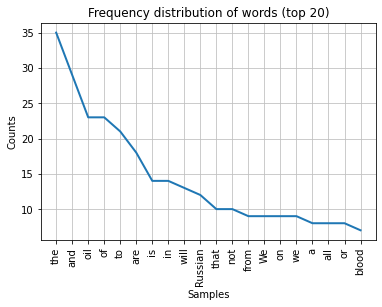

    the     and     oil      of      to     are      is      in    will Russian    that     not    from      We      on      we       a     all      or   blood 
     35      29      23      23      21      18      14      14      13      12      10      10       9       9       9       9       8       8       8       7 


In [69]:
# Frequency distribution
fdist = FreqDist(tokenized_word)

fdist.plot(20, title="Frequency distribution of words (top 20)", cumulative=False)
plt.show()

fdist.tabulate(20)


## Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [70]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{"aren't", 'her', 'your', 'mustn', 'them', "won't", "shan't", 'on', 'and', 'wouldn', 'here', 'herself', 'then', 'yourselves', 'through', 'why', 'what', 'couldn', 'hers', 'ourselves', 'to', 'our', 'isn', 'off', "you're", 'are', 'had', 'over', 'same', "don't", "shouldn't", 'that', 'if', 'have', 'his', 'has', 'by', 'for', "hasn't", 'been', 'yourself', 'll', "didn't", 'myself', 'theirs', 'between', 'wasn', 'did', 'won', 'below', 'at', "doesn't", 'because', 'they', "you'll", 'any', 'in', 's', 'was', 'does', 'against', 'o', "that'll", 'but', 'how', 'out', 'needn', 'it', 'again', 'mightn', 'weren', 'will', 'nor', 'which', 'this', 'those', 'no', 'these', 'i', 'doesn', 'yours', 'above', 'should', 'before', 'being', 'itself', 'himself', 'under', 'hadn', 'me', 'from', 'as', 'very', 'ma', 'while', 'not', 'him', 'ours', 'so', 'their', 'is', 'both', 'or', 'ain', 'doing', "wasn't", 'having', 'shan', 'own', 'who', 'whom', 'he', 'when', 'of', 'themselves', 'a', "hadn't", 'd', 'other', 'am', 'after', 'a

In [71]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['oil', 'funding', 'invasion', 'Ukraine', 'murder', 'innocent', 'people', 'money', 'sale', 'blood', 'diamonds', 'fuelled', 'brutal', 'civil', 'war', 'Africa', 'We', 'must', 'cut', 'funding', 'source', 'This', 'trade', 'must', 'stopped', 'pressure', 'brought', 'consumer', 'companies', 'governments', 'Vladimir', 'Putin', 'sells', '5m', 'barrels', 'crude', 'oil', 'per', 'day', 'large', 'share', 'goes', 'Europe', 'Today', 'EU', 'leaders', 'gather', 'discuss', 'crisis', 'call', 'people', 'everywhere', 'boycott', 'Russian', 'oil', 'We', 'receiving', 'great', 'support', 'many', 'governments', 'people', 'They', 'taking', 'refugees', 'sending', 'us', 'food', 'medicine', 'voted', 'Putin', 'war', 'United', 'Nations', 'On', 'Tuesday', 'Biden', 'administration', 'agreed', 'ban', 'US', 'imports', 'Russian', 'oil', 'gas', 'But', 'political', 'leaders', 'Germany', 'Italy', 'UK', 'countries', 'afraid', 'impose', 'immediate', 'embargo', 'They', 'afraid', 'oil', 'prices', 'go', 'voters'

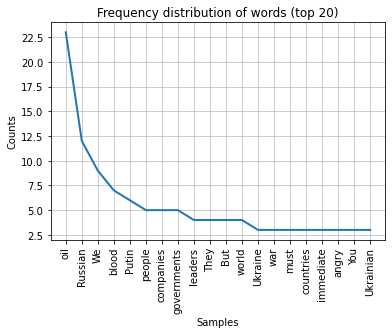

        oil     Russian          We       blood       Putin      people   companies governments     leaders        They         But       world     Ukraine         war        must   countries   immediate       angry         You   Ukrainian 
         23          12           9           7           6           5           5           5           4           4           4           4           3           3           3           3           3           3           3           3 


In [72]:
# Frequency distribution
fdist = FreqDist(filtered_sent)

fdist.plot(20, title="Frequency distribution of words (top 20)", cumulative=False)
plt.show()

fdist.tabulate(20)

***
## Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

In [115]:
##utilizando nklt vader


In [73]:
# Sentiment intensity analysis
sia = SentimentIntensityAnalyzer()

# Compound score can range -1 (negative) to 1 (positive)
print(f"Overall article compound score: {sia.polarity_scores(articulo)['compound']}")

Overall article compound score: -0.9987


In [74]:
df = pd.DataFrame(sent_tokenize(articulo), columns=['Sentence'])
df['Compound_score'] = df['Sentence'].apply(lambda sentence: sia.polarity_scores(sentence)['compound'])

df.head(10)

,Sentence,Compound_score
0,﻿Russian oil is funding the invasion of Ukrain...,-0.9062
1,We must cut off this funding at source.,-0.2732
2,This trade can and must be stopped through pre...,-0.4767
3,Vladimir Putin sells 5m barrels of crude oil p...,-0.3612
4,"Today, as EU leaders gather to discuss the cri...",-0.7506
5,We are receiving great support from many gover...,0.7783
6,"They are taking in our refugees, they are send...",-0.2732
7,"On Tuesday, the Biden administration agreed to...",-0.3612
8,"But political leaders in Germany, Italy, the U...",-0.4215
9,"They are afraid that oil prices will go up, an...",-0.0258


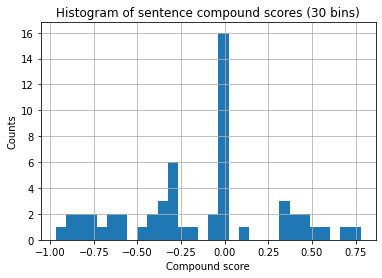

In [75]:
N_BINS = 30
df.Compound_score.hist(bins=N_BINS);
plt.title(f'Histogram of sentence compound scores ({N_BINS} bins)');
plt.xlabel('Compound score');
plt.ylabel('Counts');

La mayoría de frases tienen un sentimiento neutro o negativo

***